In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\ML_health\pbicr_11\Item_Scores_dep.xlsx')
df.head()

,Number,liveStrict,hukou,homeNum,chaiqian,home_mianji,zhaiwu,family_income,gender,age,...,Stress1,Stress2,Stress3,Emontion_regulate1,Emontion_regulate2,Emontion_regulate3,Emontion_regulate4,Emontion_regulate5,Emontion_regulate6,risk_depression
0,1,1,1,2,0,4,1,8,2,2,...,2,2,3,1,1,3,0,3,3,0
1,2,1,1,1,0,3,0,1,2,2,...,2,5,3,3,3,3,3,3,1,0
2,3,1,1,3,1,4,1,2,2,5,...,2,2,2,1,2,2,0,0,3,0
3,4,2,2,1,0,4,0,3,2,1,...,1,1,1,0,1,4,3,3,3,1
4,5,1,1,0,0,1,0,1,1,2,...,5,4,4,4,3,2,3,3,3,1


In [3]:
X = df.drop('risk_depression', axis = 1)
X.shape

(11031, 97)

In [4]:
y=df['risk_depression']
y.shape

(11031,)

In [5]:
pd.Series(y).value_counts()

risk_depression
0    8832
1    2199
Name: count, dtype: int64

In [6]:
smote = SMOTE()

In [7]:
X.dtypes

Number                int64
liveStrict            int64
hukou                 int64
homeNum               int64
chaiqian              int64
                      ...  
Emontion_regulate2    int64
Emontion_regulate3    int64
Emontion_regulate4    int64
Emontion_regulate5    int64
Emontion_regulate6    int64
Length: 97, dtype: object

In [8]:
X = X.apply(pd.to_numeric, errors='coerce')

In [9]:
X.dtypes

Number                int64
liveStrict            int64
hukou                 int64
homeNum               int64
chaiqian              int64
                      ...  
Emontion_regulate2    int64
Emontion_regulate3    int64
Emontion_regulate4    int64
Emontion_regulate5    int64
Emontion_regulate6    int64
Length: 97, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

In [11]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
print(y_train.value_counts())  # 原始训练集的类别分布
print(y_train_resampled.value_counts())  # 过采样后的类别分布

risk_depression
0    7963
1    1964
Name: count, dtype: int64
risk_depression
0    7963
1    7963
Name: count, dtype: int64


In [13]:
df2=pd.concat([y_train_resampled, X_train_resampled], axis=1)

In [14]:
df2.to_excel(r'C:\Users\Lenovo\Desktop\ML_health\pbicr_11\Item_Scores_dep_smote.xlsx',index = False)

In [2]:
df3 = pd.read_excel(r'C:\Users\Lenovo\Desktop\ML_health\pbicr_11\Item_Scores_dep_smote.xlsx')

In [3]:
X = df3.drop('risk_depression', axis = 1)
X.shape

(15926, 97)

In [4]:
y=df3['risk_depression']
y.shape

(15926,)

In [5]:
X = df3.drop(['risk_depression', 'Number'], axis=1)

In [6]:
X.shape

(15926, 96)

In [7]:
y=df3['risk_depression']
y.shape

(15926,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 创建决策树分类器
model = DecisionTreeClassifier()

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []

# 进行10×10交叉验证
for train_index, test_index in kf.split(X_train):
    # 分割数据，使用 .iloc 来根据行索引选择数据
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 训练模型
    model.fit(X_train_fold, y_train_fold)
    
    # 进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    # 计算并存储每个指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_test_fold, y_pred_fold, average='macro')
    precision_scores.append(precision)
    
    recall = recall_score(y_test_fold, y_pred_fold, average='macro')
    recall_scores.append(recall)
    
    f1 = f1_score(y_test_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)
    
    # 如果模型是二分类模型，并且你已经有了模型预测的概率，可以计算ROC AUC
    if len(set(y_test_fold)) == 2:
        y_scores_fold = model.predict_proba(X_test_fold)[:, 1]  # 获取正类的概率
        roc_auc = roc_auc_score(y_test_fold, y_scores_fold)
        roc_auc_scores.append(roc_auc)
    
    # 计算Specificity
    conf_mat_fold = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = conf_mat_fold.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores.append(specificity)

# 输出每个指标的平均值
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Average Precision:", sum(precision_scores) / len(precision_scores))
print("Average Recall:", sum(recall_scores) / len(recall_scores))
print("Average F1 Score:", sum(f1_scores) / len(f1_scores))
if roc_auc_scores:
    print("Average ROC AUC:", sum(roc_auc_scores) / len(roc_auc_scores))
print("Average Specificity:", sum(specificity_scores) / len(specificity_scores))

Average Accuracy: 0.8257863315493241
Average Precision: 0.8261158179569087
Average Recall: 0.825942973296077
Average F1 Score: 0.8256544389953294
Average ROC AUC: 0.825942973296077
Average Specificity: 0.8111400566172963


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


model = GaussianNB()

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []

# 进行10×10交叉验证
for train_index, test_index in kf.split(X_train):
    # 分割数据，使用 .iloc 来根据行索引选择数据
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 训练模型
    model.fit(X_train_fold, y_train_fold)
    
    # 进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    # 计算并存储每个指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_test_fold, y_pred_fold, average='macro')
    precision_scores.append(precision)
    
    recall = recall_score(y_test_fold, y_pred_fold, average='macro')
    recall_scores.append(recall)
    
    f1 = f1_score(y_test_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)
    
    # 如果模型是二分类模型，并且你已经有了模型预测的概率，可以计算ROC AUC
    if len(set(y_test_fold)) == 2:
        y_scores_fold = model.predict_proba(X_test_fold)[:, 1]  # 获取正类的概率
        roc_auc = roc_auc_score(y_test_fold, y_scores_fold)
        roc_auc_scores.append(roc_auc)
    
    # 计算Specificity
    conf_mat_fold = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = conf_mat_fold.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores.append(specificity)

# 输出每个指标的平均值
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Average Precision:", sum(precision_scores) / len(precision_scores))
print("Average Recall:", sum(recall_scores) / len(recall_scores))
print("Average F1 Score:", sum(f1_scores) / len(f1_scores))
if roc_auc_scores:
    print("Average ROC AUC:", sum(roc_auc_scores) / len(roc_auc_scores))
print("Average Specificity:", sum(specificity_scores) / len(specificity_scores))

Average Accuracy: 0.800251980367138
Average Precision: 0.8002320300772651
Average Recall: 0.8000825929057764
Average F1 Score: 0.8000325328466514
Average ROC AUC: 0.8753800901859886
Average Specificity: 0.7894916282550632


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


model = LogisticRegression(max_iter=2000)

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []

# 进行10×10交叉验证
for train_index, test_index in kf.split(X_train):
    # 分割数据，使用 .iloc 来根据行索引选择数据
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 训练模型
    model.fit(X_train_fold, y_train_fold)
    
    # 进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    # 计算并存储每个指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_test_fold, y_pred_fold, average='macro')
    precision_scores.append(precision)
    
    recall = recall_score(y_test_fold, y_pred_fold, average='macro')
    recall_scores.append(recall)
    
    f1 = f1_score(y_test_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)
    
    # 如果模型是二分类模型，并且你已经有了模型预测的概率，可以计算ROC AUC
    if len(set(y_test_fold)) == 2:
        y_scores_fold = model.predict_proba(X_test_fold)[:, 1]  # 获取正类的概率
        roc_auc = roc_auc_score(y_test_fold, y_scores_fold)
        roc_auc_scores.append(roc_auc)
    
    # 计算Specificity
    conf_mat_fold = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = conf_mat_fold.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores.append(specificity)

# 输出每个指标的平均值
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Average Precision:", sum(precision_scores) / len(precision_scores))
print("Average Recall:", sum(recall_scores) / len(recall_scores))
print("Average F1 Score:", sum(f1_scores) / len(f1_scores))
if roc_auc_scores:
    print("Average ROC AUC:", sum(roc_auc_scores) / len(roc_auc_scores))
print("Average Specificity:", sum(specificity_scores) / len(specificity_scores))

Average Accuracy: 0.8647879578884259
Average Precision: 0.8648595866405895
Average Recall: 0.8647734821810886
Average F1 Score: 0.8646644121036513
Average ROC AUC: 0.9362376349547198
Average Specificity: 0.866438337138514


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = KNeighborsClassifier()

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []

# 进行10×10交叉验证
for train_index, test_index in kf.split(X_train):
    # 分割数据，使用 .iloc 来根据行索引选择数据
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 训练模型
    model.fit(X_train_fold, y_train_fold)
    
    # 进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    # 计算并存储每个指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_test_fold, y_pred_fold, average='macro')
    precision_scores.append(precision)
    
    recall = recall_score(y_test_fold, y_pred_fold, average='macro')
    recall_scores.append(recall)
    
    f1 = f1_score(y_test_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)
    
    # 如果模型是二分类模型，并且你已经有了模型预测的概率，可以计算ROC AUC
    if len(set(y_test_fold)) == 2:
        y_scores_fold = model.predict_proba(X_test_fold)[:, 1]  # 获取正类的概率
        roc_auc = roc_auc_score(y_test_fold, y_scores_fold)
        roc_auc_scores.append(roc_auc)
    
    # 计算Specificity
    conf_mat_fold = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = conf_mat_fold.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores.append(specificity)

# 输出每个指标的平均值
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Average Precision:", sum(precision_scores) / len(precision_scores))
print("Average Recall:", sum(recall_scores) / len(recall_scores))
print("Average F1 Score:", sum(f1_scores) / len(f1_scores))
if roc_auc_scores:
    print("Average ROC AUC:", sum(roc_auc_scores) / len(roc_auc_scores))
print("Average Specificity:", sum(specificity_scores) / len(specificity_scores))

Average Accuracy: 0.8989048732749954
Average Precision: 0.9015570193233602
Average Recall: 0.8988013422480451
Average F1 Score: 0.8986464801382441
Average ROC AUC: 0.9589081165012405
Average Specificity: 0.8582913458942153


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = RandomForestClassifier()

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []

# 进行10×10交叉验证
for train_index, test_index in kf.split(X_train):
    # 分割数据，使用 .iloc 来根据行索引选择数据
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 训练模型
    model.fit(X_train_fold, y_train_fold)
    
    # 进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    # 计算并存储每个指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    
    precision = precision_score(y_test_fold, y_pred_fold, average='macro')
    precision_scores.append(precision)
    
    recall = recall_score(y_test_fold, y_pred_fold, average='macro')
    recall_scores.append(recall)
    
    f1 = f1_score(y_test_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)
    
    # 如果模型是二分类模型，并且你已经有了模型预测的概率，可以计算ROC AUC
    if len(set(y_test_fold)) == 2:
        y_scores_fold = model.predict_proba(X_test_fold)[:, 1]  # 获取正类的概率
        roc_auc = roc_auc_score(y_test_fold, y_scores_fold)
        roc_auc_scores.append(roc_auc)
    
    # 计算Specificity
    conf_mat_fold = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = conf_mat_fold.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores.append(specificity)

# 输出每个指标的平均值
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Average Precision:", sum(precision_scores) / len(precision_scores))
print("Average Recall:", sum(recall_scores) / len(recall_scores))
print("Average F1 Score:", sum(f1_scores) / len(f1_scores))
if roc_auc_scores:
    print("Average ROC AUC:", sum(roc_auc_scores) / len(roc_auc_scores))
print("Average Specificity:", sum(specificity_scores) / len(specificity_scores))

Average Accuracy: 0.9037182433201844
Average Precision: 0.9036180162084939
Average Recall: 0.9037393343428599
Average F1 Score: 0.9036439630367832
Average ROC AUC: 0.967792142877457
Average Specificity: 0.9060043566325824


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 创建随机森林分类器
model = RandomForestClassifier()

# 定义参数网格
param_grid = {
    'n_estimators': [400],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 设置网格搜索，使用 KFold 交叉验证，并指定refit参数
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', refit=True, verbose=1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 获取最佳模型
best_rf = grid_search.best_estimator_

# 使用最佳模型进行交叉验证预测
y_pred = cross_val_predict(best_rf, X_train, y_train, cv=kf)

# 计算所有指标的平均值
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='macro')
recall = recall_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

# 如果是二分类问题，计算ROC AUC
if len(set(y_train)) == 2:
    y_scores = best_rf.predict_proba(X_train)[:, 1]
    roc_auc = roc_auc_score(y_train, y_scores)
else:
    roc_auc = None  # 对于多分类问题，ROC AUC需要不同的处理

# 打印分类报告
print(classification_report(y_train, y_pred))

# 打印混淆矩阵
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)

# 输出每个指标的平均值
print("Average Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1 Score:", f1)
if roc_auc is not None:
    print("Average ROC AUC:", roc_auc)

# 计算Specificity
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print("Average Specificity:", specificity)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7163
           1       0.91      0.91      0.91      7170

    accuracy                           0.91     14333
   macro avg       0.91      0.91      0.91     14333
weighted avg       0.91      0.91      0.91     14333

[[6505  658]
 [ 665 6505]]
Average Accuracy: 0.9076955278029721
Average Precision: 0.9076957443051041
Average Recall: 0.9076957443051041
Average F1 Score: 0.9076955278029721
Average ROC AUC: 1.0
Average Specificity: 0.9081390478849644


In [10]:
# 获取特征重要性
feature_importances = best_rf.feature_importances_

# 排序特征
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 打印特征重要性排序
print(importance_df)
print(importance_df.head(10))

       Feature  Importance
61  EQ-5D-5L-5    0.045289
56  FHS-SF10_R    0.043995
52   FHS-SF6_R    0.041375
55   FHS-SF9_R    0.029103
83    Fitness3    0.027131
..         ...         ...
5       zhaiwu    0.004634
70  HLS-SF12-9    0.004608
59  EQ-5D-5L-3    0.004503
14       smoke    0.003650
3     chaiqian    0.001723

[96 rows x 2 columns]
       Feature  Importance
61  EQ-5D-5L-5    0.045289
56  FHS-SF10_R    0.043995
52   FHS-SF6_R    0.041375
55   FHS-SF9_R    0.029103
83    Fitness3    0.027131
88     Stress2    0.023362
87     Stress1    0.023203
19      BFI3_R    0.021997
49     FHS-SF3    0.020715
48     FHS-SF2    0.020373


In [12]:
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()
threshold = 0.8  # 这里设定80%的阈值
N = importance_df[importance_df['Cumulative Importance'] <= threshold].shape[0]
# 打印特征重要性排序
pd.options.display.max_rows = None
print(importance_df.head(N))

               Feature  Importance  Cumulative Importance
61          EQ-5D-5L-5    0.045289               0.045289
56          FHS-SF10_R    0.043995               0.089284
52           FHS-SF6_R    0.041375               0.130659
55           FHS-SF9_R    0.029103               0.159762
83            Fitness3    0.027131               0.186893
88             Stress2    0.023362               0.210255
87             Stress1    0.023203               0.233458
19              BFI3_R    0.021997               0.255455
49             FHS-SF3    0.020715               0.276171
48             FHS-SF2    0.020373               0.296544
85            Fitness5    0.019996               0.316540
23              BFI7_R    0.018285               0.334825
47             FHS-SF1    0.017888               0.352712
10            marriage    0.017855               0.370568
16                 BMI    0.016069               0.386637
50             FHS-SF4    0.015761               0.402397
12          br

In [13]:
from joblib import dump, load
dump(best_rf, 'best_rf_itemdep.joblib')

['best_rf_itemdep.joblib']

In [11]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 参数网格
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 41, 51]
}

# 创建 LightGBM 分类器
gbm = LGBMClassifier()

# 创建 KFold 交叉验证分割器
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 创建网格搜索对象，使用 KFold 交叉验证
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 最佳参数和最佳模型
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 使用最佳模型进行交叉验证预测
y_pred = cross_val_predict(best_model, X_train, y_train, cv=kf)

# 计算所有指标的平均值
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='macro')
recall = recall_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

# 如果是二分类问题，计算ROC AUC
if len(set(y_train)) == 2:
    y_scores = best_model.predict_proba(X_train)[:, 1]
    roc_auc = roc_auc_score(y_train, y_scores)
else:
    roc_auc = None  # 对于多分类问题，ROC AUC需要不同的处理

# 打印分类报告
print(classification_report(y_train, y_pred))

# 打印混淆矩阵
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)

# 输出每个指标的平均值
print("Average Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1 Score:", f1)
if roc_auc is not None:
    print("Average ROC AUC:", roc_auc)

# 计算Specificity
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print("Average Specificity:", specificity)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Info] Number of positive: 6450, number of negative: 6449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 12899, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500039 -> initscore=0.000155
[LightGBM] [Info] Start training from score 0.000155
[LightGBM] [Info] Number of positive: 6472, number of negative: 6427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set

In [12]:
# 获取特征重要性
feature_importances = best_model.feature_importances_

# 排序特征
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 打印特征重要性排序
print(importance_df)
print(importance_df.head(10))

          Feature  Importance
16            BMI        1556
8             age         640
6   family_income         594
9             edu         531
87        Stress1         521
..            ...         ...
69     HLS-SF12-8         118
57     EQ-5D-5L-1          95
3        chaiqian          79
58     EQ-5D-5L-2          55
59     EQ-5D-5L-3          29

[96 rows x 2 columns]
          Feature  Importance
16            BMI        1556
8             age         640
6   family_income         594
9             edu         531
87        Stress1         521
89        Stress3         459
4     home_mianji         422
19         BFI3_R         410
82       Fitness2         409
81       Fitness1         403


In [14]:
from joblib import dump, load
dump(best_model, 'best_gbm_itemdep.joblib')

['best_gbm_itemdep.joblib']

In [15]:
from joblib import load
best_rf = load('best_rf_itemdep.joblib')
best_gbm = load('best_gbm_itemdep.joblib')

# 已经训练好随机森林模型
feature_importances_rf = best_rf.feature_importances_
feature_names = X.columns

# 将特征重要性和特征名组合成DataFrame
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

feature_importances_lgbm = best_gbm.feature_importances_

# 将特征重要性和特征名组合成DataFrame
importance_df_lgbm = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_lgbm})

In [16]:
# 找到随机森林模型特征重要性中的最大值
max_importance_rf = importance_df_rf['Importance'].max()

# 对随机森林模型的特征重要性进行标准化，使最大特征值为100
importance_df_rf['Standardized Importance'] = importance_df_rf['Importance'] * (100 / max_importance_rf)

# 找到LightGBM模型特征重要性中的最大值
max_importance_lgbm = importance_df_lgbm['Importance'].max()

# 对LightGBM模型的特征重要性进行标准化，使最大特征值为100
importance_df_lgbm['Standardized Importance'] = importance_df_lgbm['Importance'] * (100 / max_importance_lgbm)


In [17]:
# 按照特征名进行合并
merged_importance_df = pd.merge(importance_df_rf, importance_df_lgbm, on='Feature')

# 计算每个特征的重要性平均值
merged_importance_df['Average Importance'] = (merged_importance_df['Standardized Importance_x'] + merged_importance_df['Standardized Importance_y']) / 2

In [18]:
print(merged_importance_df)

               Feature  Importance_x  Standardized Importance_x  Importance_y  \
0           liveStrict      0.005518                  12.184329           145   
1                hukou      0.005588                  12.338284           188   
2              homeNum      0.007796                  17.214408           282   
3             chaiqian      0.001723                   3.804687            79   
4          home_mianji      0.009774                  21.581534           422   
5               zhaiwu      0.004634                  10.231481           237   
6        family_income      0.008984                  19.836092           594   
7               gender      0.007151                  15.790393           223   
8                  age      0.012847                  28.366712           640   
9                  edu      0.008595                  18.977957           531   
10            marriage      0.017855                  39.425546           209   
11           child_Num      

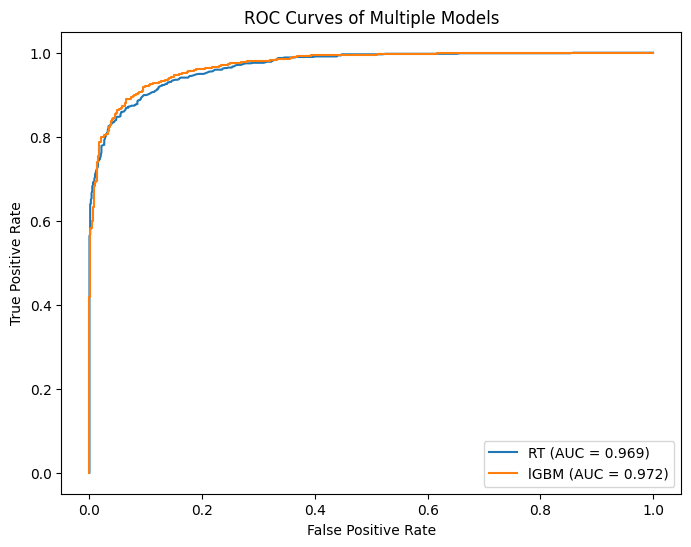

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 使用模型1进行预测，获取预测概率
y_pred_proba_model_rf = best_rf.predict_proba(X_val)[:, 1]

# 使用模型2进行预测，获取预测概率
y_pred_proba_model_gbm = best_gbm.predict_proba(X_val)[:, 1]

# 计算模型1的ROC曲线
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(y_val, y_pred_proba_model_rf)

# 计算模型1的AUC值
auc_model1 = auc(fpr_model1, tpr_model1)

# 计算模型2的ROC曲线
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(y_val, y_pred_proba_model_gbm)

# 计算模型2的AUC值
auc_model2 = auc(fpr_model2, tpr_model2)

plt.figure(figsize=(8, 6))
plt.title('ROC Curves of Multiple Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 绘制模型1的ROC曲线
plt.plot(fpr_model1, tpr_model1, label='RT (AUC = {:.3f})'.format(auc_model1))

# 绘制模型2的ROC曲线
plt.plot(fpr_model2, tpr_model2, label='lGBM (AUC = {:.3f})'.format(auc_model2))

plt.legend(loc='lower right')
plt.show()

In [22]:
# 添加对角线
#plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
# 修改标题
# plt.title('Comparison of ROC Curves for Different Models')

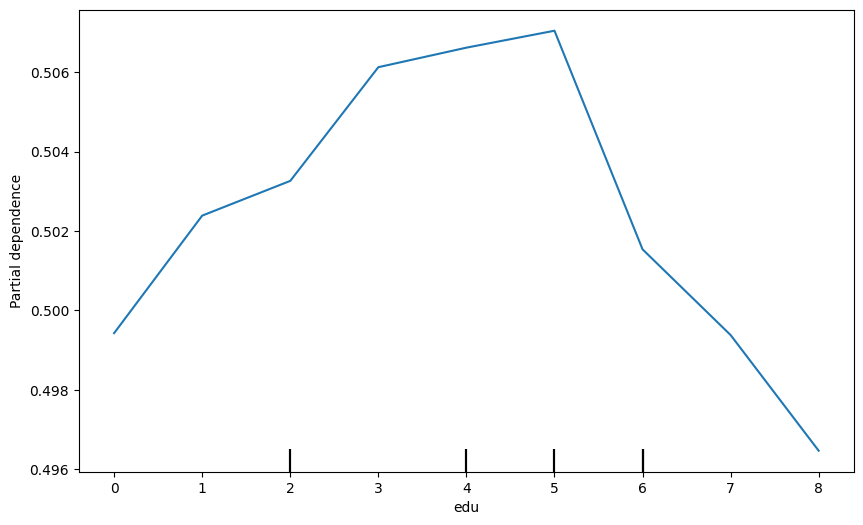

In [25]:
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

feature_names = X.columns

# 您想分析的特征名称
feature_names_to_analyze = ['edu']

# 使用字典来存储特征名称和它们对应的索引
feature_index_map = {name: i for i, name in enumerate(feature_names)}

# 将特征名称映射到索引
features = [feature_index_map[name] for name in feature_names_to_analyze]

# 绘制partial dependence图
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(best_rf, X, features, ax=ax, feature_names=feature_names)
plt.show()

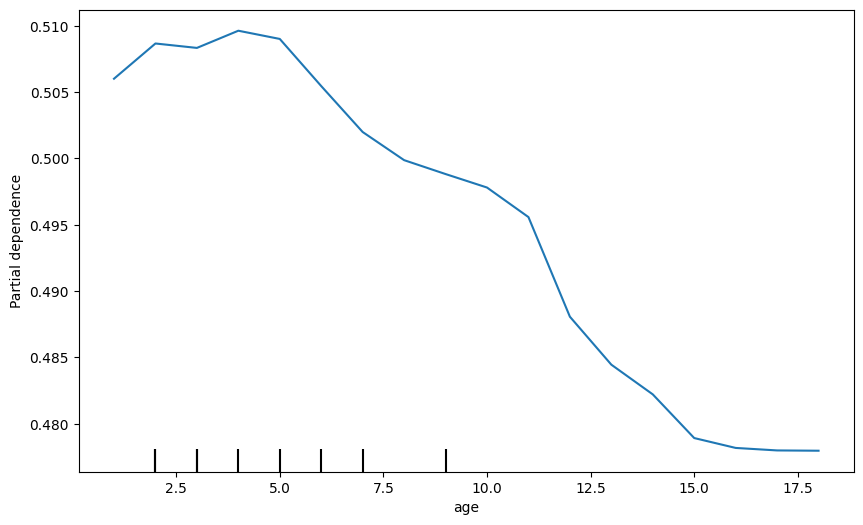

In [26]:
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

feature_names = X.columns

# 您想分析的特征名称
feature_names_to_analyze = ['age']

# 使用字典来存储特征名称和它们对应的索引
feature_index_map = {name: i for i, name in enumerate(feature_names)}

# 将特征名称映射到索引
features = [feature_index_map[name] for name in feature_names_to_analyze]

# 绘制partial dependence图
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(best_rf, X, features, ax=ax, feature_names=feature_names)
plt.show()

In [27]:
df = pd.DataFrame(merged_importance_df)
df.to_excel(r'C:\Users\Lenovo\Desktop\ML_health\merged_importance_df_itemdep.xlsx', index=False, engine='openpyxl')